<a href="https://colab.research.google.com/github/francealip/assignment_1_ISPR_23-24/blob/main/src/LoG_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>ASSIGNMENT 7: implementation of blob detector using laplatian of a gaussian<h2>

<h4><b>Author</b>: Aliprandi Francesco<h4>


<h4><b>1. CODE</b></h4>


In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
#Utiliy functions for image processing

def read_images(dir):
    """
    function that read the images in the directory and return a list of images

    :dir: directory path of the images
    :return: list of images
    """
    img = []
    # Loop through each file in the directory
    for filename in os.listdir(dir):
        if filename.endswith(".png"):
            image_path = os.path.join(dir, filename)
            # Open the image and convert to grey scale
            image = Image.open(image_path).convert("L")
            img.append(image)
    return img

def laplacian_of_gaussian(sigma):
    """
    Create the laplacian of a Gaussian filter kernel.

    :parameter sigma: Standard deviation of the Gaussian function.
    :return: LoG filter kernel
    """
    size = 6*sigma
    # Create vector of coordinates
    x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))

    # Compute normalized laplacian of a Gaussian function using the coordinates
    log = ((-1/(np.pi * sigma**2))*(1-((x*x+y*y)/(2*sigma**2)))*np.exp(-(x*x+y*y)/(2*sigma**2)))
    return log

def filter_size(filter):
    """
    function that returns the size of the filter

    :param filter: filter
    :return: size of the filter
    """
    return filter.shape[0]

def convolution(img, filter):
    """
    function that performs convolution on the image with LoG filter

    :param img: image to be convoluted
    :param filter: filter to convolve
    :return: convoluted image
    """
    img = np.array(img)

    conv_dim = tuple(x - y + 1 for x, y in zip(img.shape, filter.shape))
    img_conv = np.zeros(conv_dim)
    print(img_conv.shape)
    for i in range(conv_dim[0]):
        for j in range(conv_dim[1]):
            img_conv[i, j] = np.sum(img[i:i+filter.shape[0], j:j+filter.shape[1]]*filter)

    return img_conv


In [ ]:
#support function for plotting

def plot_image(image,i,sigma):
    """
    function that plots the images in the list

    :param images: list of images
    :param i: index of the image
    :param sigma: standard deviation of the filter
    """
    plt.imshow(image, cmap='gray')
    plt.title('Immagine'+str(i)+"_sigma_"+ str(sigma))
    plt.axis('off')  # Disabilita gli assi
    plt.show()

    (plt.gcf())

def bid_plot(LoG_filter):
    """
    plot of the LoG filter in 2D space

    :parameter LoG_filter: LoG filter kernel
    """

    # Plot the LoG filter as an image
    plt.imshow(LoG_filter, cmap='gray')
    plt.title('2D - Laplacian of Gaussian Filter')
    plt.colorbar(label='Filter Value')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

def tridim_plot(LoG_filter,sigma):
    """
    plot of the LoG filter in 3D space

    :parameter LoG_filter: LoG filter kernel
    """
    size = 6*sigma

    # Create vector of coordinates
    x = np.arange(-size//2+1 , size//2 + 1)
    y = np.arange(-size//2+1 , size//2 + 1)
    x, y = np.meshgrid(x, y)
    z = LoG_filter

    # Plot 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Filter Value')
    ax.set_title('3D Plot of Laplacian of Gaussian Filter')

    plt.show()


<h4>2. TEST</h4>

In [ ]:
#get images directory

current_dir = os. getcwd()
parent_dir = os.path.dirname(current_dir)
img_dir = os.path.join(parent_dir, "images")

#read test images
img1, img2, img3 = read_images(img_dir)

#img2.show()

<h4>2.1 Test su immagine 1</h4>

In [ ]:
sigma = 0.5
plot_image(img1,1,0)
for i in range(5):
    sigma = sigma *2
    filter = laplacian_of_gaussian(sigma)
    result = convolution(img1, filter)
    plot_image(result,1,sigma)


(285, 333)


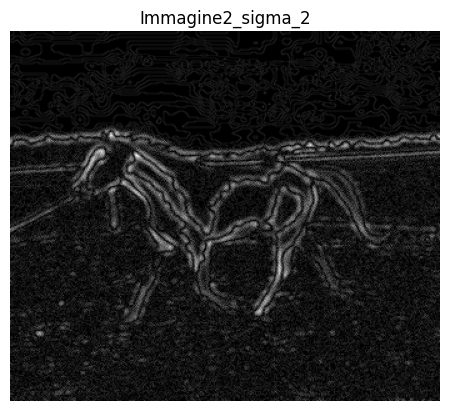

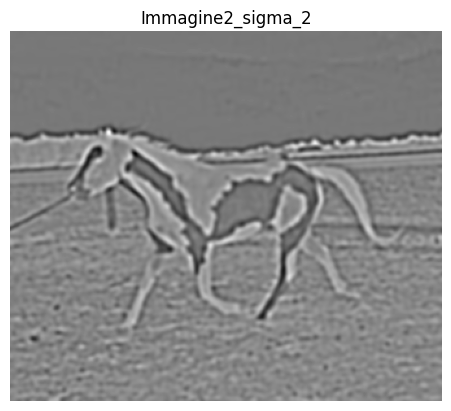

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np

# Leggi l'immagine
img = np.array(img2)


# Applica il filtro LoG con sigma = 1
blurred = cv2.GaussianBlur(img, (0, 0), 2)
result1 = cv2.Laplacian(blurred, cv2.CV_64F)

# Converte l'immagine in un array NumPy
result1 = np.uint8(np.absolute(result1))


sigma =  2
filter = laplacian_of_gaussian(sigma)
result = convolution(img, filter)

plot_image(result1,2,2)
plot_image(result,2,2)



In [ ]:
"""img, y = np.meshgrid(np.arange(-5,6), np.arange(-7,8))
filter, x = np.meshgrid([1,1,1], [1,1,1])

# Imposta le opzioni di stampa per l'allineamento
np.set_printoptions(precision=2, suppress=True, linewidth=120)

print(img)
print(convolution(img, filter))"""

"img, y = np.meshgrid(np.arange(-5,6), np.arange(-7,8))\nfilter, x = np.meshgrid([1,1,1], [1,1,1])\n\n# Imposta le opzioni di stampa per l'allineamento\nnp.set_printoptions(precision=2, suppress=True, linewidth=120)\n\nprint(img)\nprint(convolution(img, filter))"